In [1]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='FJUN1WZFGMLHV93F', output_format='pandas')
df, meta_data = ts.get_intraday(symbol='AAPL', interval='1min', outputsize='full')
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-03-07 19:59:00,238.7500,238.7500,238.6500,238.6500,680.0
2025-03-07 19:58:00,238.7000,238.7000,238.6600,238.7000,554.0
2025-03-07 19:57:00,238.6999,238.6999,238.6500,238.6500,55.0
2025-03-07 19:56:00,238.6999,238.7000,238.6000,238.6999,284.0
2025-03-07 19:55:00,238.6993,238.7000,238.5400,238.7000,180.0
...,...,...,...,...,...
2025-02-06 04:04:00,231.9753,232.0352,231.9153,231.9453,434.0
2025-02-06 04:03:00,232.0452,232.0951,231.9153,231.9553,951.0
2025-02-06 04:02:00,232.0851,232.1750,232.0152,232.0552,379.0


In [13]:
df.to_csv('AAPL.csv')

In [41]:
import pandas as pd
df = pd.read_csv('AAPL.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-03-07 19:59:00,238.7500,238.7500,238.6500,238.6500,680.0
2025-03-07 19:58:00,238.7000,238.7000,238.6600,238.7000,554.0
2025-03-07 19:57:00,238.6999,238.6999,238.6500,238.6500,55.0
2025-03-07 19:56:00,238.6999,238.7000,238.6000,238.6999,284.0
2025-03-07 19:55:00,238.6993,238.7000,238.5400,238.7000,180.0
...,...,...,...,...,...
2025-02-06 04:04:00,231.9753,232.0352,231.9153,231.9453,434.0
2025-02-06 04:03:00,232.0452,232.0951,231.9153,231.9553,951.0
2025-02-06 04:02:00,232.0851,232.1750,232.0152,232.0552,379.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20077 entries, 2025-03-07 19:59:00 to 2025-02-06 04:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    20077 non-null  float64
 1   2. high    20077 non-null  float64
 2   3. low     20077 non-null  float64
 3   4. close   20077 non-null  float64
 4   5. volume  20077 non-null  float64
dtypes: float64(5)
memory usage: 941.1 KB


In [43]:
df.isna().sum()
# df = df.filna(method='ffill')

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

### no null values

In [44]:
df.columns = ['open', 'high', 'low', 'close', 'volume']

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']])
df_scaled

array([[6.60326377e-01, 3.22819875e-01, 6.78994748e-01, 4.11596386e-01,
        2.34766798e-05],
       [6.58886056e-01, 3.21536807e-01, 6.79286837e-01, 4.13050369e-01,
        1.91201826e-05],
       [6.58883176e-01, 3.21534241e-01, 6.78994748e-01, 4.11596386e-01,
        1.86707027e-06],
       ...,
       [4.68334558e-01, 1.54096451e-01, 4.85199876e-01, 2.19821858e-01,
        1.30694919e-05],
       [4.67473246e-01, 1.57173248e-01, 4.85784053e-01, 2.20691340e-01,
        2.16441850e-05],
       [4.71788446e-01, 1.64094116e-01, 4.77322250e-01, 2.18367875e-01,
        8.05260491e-05]])

# EDA

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [46]:
df.index

DatetimeIndex(['2025-03-07 19:59:00', '2025-03-07 19:58:00',
               '2025-03-07 19:57:00', '2025-03-07 19:56:00',
               '2025-03-07 19:55:00', '2025-03-07 19:54:00',
               '2025-03-07 19:53:00', '2025-03-07 19:52:00',
               '2025-03-07 19:51:00', '2025-03-07 19:50:00',
               ...
               '2025-02-06 04:09:00', '2025-02-06 04:08:00',
               '2025-02-06 04:07:00', '2025-02-06 04:06:00',
               '2025-02-06 04:05:00', '2025-02-06 04:04:00',
               '2025-02-06 04:03:00', '2025-02-06 04:02:00',
               '2025-02-06 04:01:00', '2025-02-06 04:00:00'],
              dtype='datetime64[ns]', name='date', length=20077, freq=None)

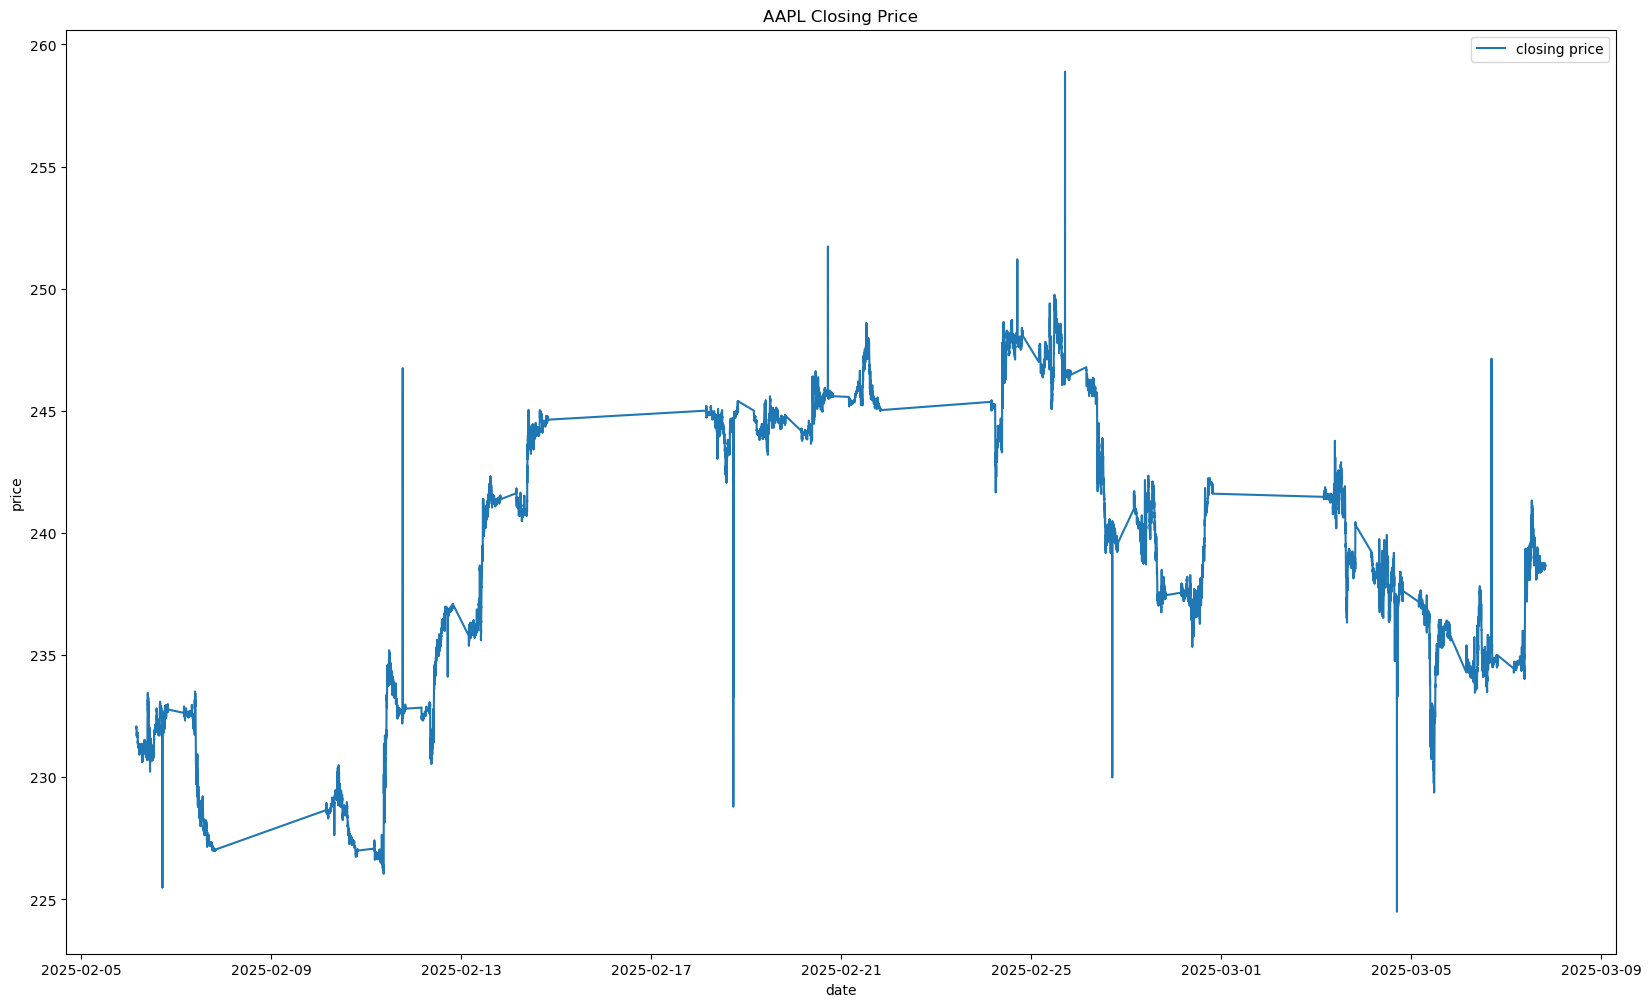

In [53]:
plt.figure(figsize=(20, 12))
plt.plot(df['close'], label='closing price')
plt.title('AAPL Closing Price')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()